<a href="https://colab.research.google.com/github/AnnaMFA/Pump-it-Up-Data-Mining-the-Water-Table/blob/main/Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Se procede a cargar los datos una vez descargados de la plataforma, y tras ejecutar las librerias basicas que utilizaremos a lo largo del proceso.

In [ ]:
#carga de los datos
datos_training = pd.read_csv('/content/drive/MyDrive/8.Machine Learning/Tarea ML/training_set_values.csv')
datos_test= pd.read_csv('/content/drive/MyDrive/8.Machine Learning/Tarea ML/test_set_values.csv')
var_dep= pd.read_csv('/content/drive/MyDrive/8.Machine Learning/Tarea ML/training_set_labels.csv')

In [ ]:
datos_training_original = pd.read_csv('/content/drive/MyDrive/8.Machine Learning/Tarea ML/training_set_values.csv').copy()


###PREPROCESAMIENTO DATOS DE ENTRENAMIENTO

Antes que nada, es necesario ver el tamaño real de nuestro conjunto de datos de prueba y entrenamiento, a través del shape.

In [ ]:
print(datos_training.shape)
print(datos_test.shape)
print(var_dep.shape)


(59400, 40)
(14850, 40)
(59400, 2)


Ya que tenemos dos datasets diferentes, uno de entrenamiento y otro de test, vamos a empezar el análisis con los datos de entrenamiento. Ahora vamos a ver los valores duplicados en los datos de training

In [ ]:
datos_training['id'].duplicated().value_counts()

id
False    59400
Name: count, dtype: int64

voy a dividir la visualización de las columnas del dataframe de training por partes para verlas todas

In [ ]:
datos_training.iloc[:, 0:15]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4


In [ ]:
datos_training.iloc[:, 15:26]

,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group
0,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity
1,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity
2,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity
3,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible
4,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity
...,...,...,...,...,...,...,...,...,...,...,...
59395,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity
59396,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity
59397,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80
59398,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira


In [ ]:
datos_training.iloc[:, 26:40]

,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


ya que son 40 columnas, vamos a trabajar con ellas segun el tipo. Vamos a empezar con las numericas y luego con las categoricas, para no repetir info, aunque hacemos un info para tener una visión general.

In [ ]:
datos_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

Empezamos leyendo los datos y viendo la información general de cada uno de los dataframes. Los datos de training y la variable objetivo tienen un total de 59400 registros. El dataframe de test, 14850. Los de training y test tienen un total de 40 variables, y el tipo de datos son la mayoria de tipo object, lo que puede indicar muchas variables categoricas, posiblemente. Aquí ya podemos ver la dimensión de los datos, por lo que empezamos a pensar en escalamiento de los datos

###variables numericas de training

Voy a trabajar primero con las varaibles numericas. Quiero juntar la lista de los valores unicos de las variables numericas

In [ ]:
columnas_numericas_training = datos_training.select_dtypes(include=['number']) #selecciono solo las numericas de training
num_valores_unicos = columnas_numericas_training.nunique()
print(num_valores_unicos)

id                   59400
amount_tsh              98
gps_height            2428
longitude            57516
latitude             57517
num_private             65
region_code             27
district_code           20
population            1049
construction_year       55
dtype: int64


In [ ]:
columnas_numericas_training.isnull().sum()

id                   0
amount_tsh           0
gps_height           0
longitude            0
latitude             0
num_private          0
region_code          0
district_code        0
population           0
construction_year    0
dtype: int64

No hay valores nulos en las numericas... pero si hay valores 0, como hemos visto en la tabla de los datos de training antes ejecutada. Vamos a ver cuantos valores 0 hay en cada variable.

In [ ]:
columnas_numericas = datos_training.select_dtypes(include=['number'])
num_zeros = (columnas_numericas == 0).sum()
print(num_zeros)


id                       1
amount_tsh           41639
gps_height           20438
longitude             1812
latitude                 0
num_private          58643
region_code              0
district_code           23
population           21381
construction_year    20709
dtype: int64


aqui podemos ver que, dependiendo del significado de cada variable, el tener valores de 0 puede ser significativo o no, como ocurre, por ejemplo, con la variable amount_tsh, que mide el nivel del agua del pozo, y tener un pozo con nivel de agua 0 puede indicar que esta vacio o que no funciona. También los valores 0 de la variable gps_height pueden ser significativos,  ya que 0 puede indicar estar al nivel del mar, o la variable population, ya que sus valores 0 pueden indicar que no hay población cercana al pozo. Luego hay otras variables en las que tener valores 0 no es significativo, por lo que se puede pensar más adelante imputarlas, o hacer otro modelo sin esas variables.

La columna num_private no sabemos cual es su significado y tiene más de 58 mil registros en 0, y teniendo el dataframe aproximadamente 59 mil registros, se considera eliminarla, de los dos dataframes: training y test

In [ ]:
datos_training.drop(columns=['num_private'], inplace=True, errors='ignore')
datos_test.drop(columns=['num_private'], inplace=True, errors='ignore')

####representación variables numericas

Podemos ver la representación visual de estas variables para ver su distribución. Empezaremos por representar las variables con pocos valores únicos, como region_code y district_code

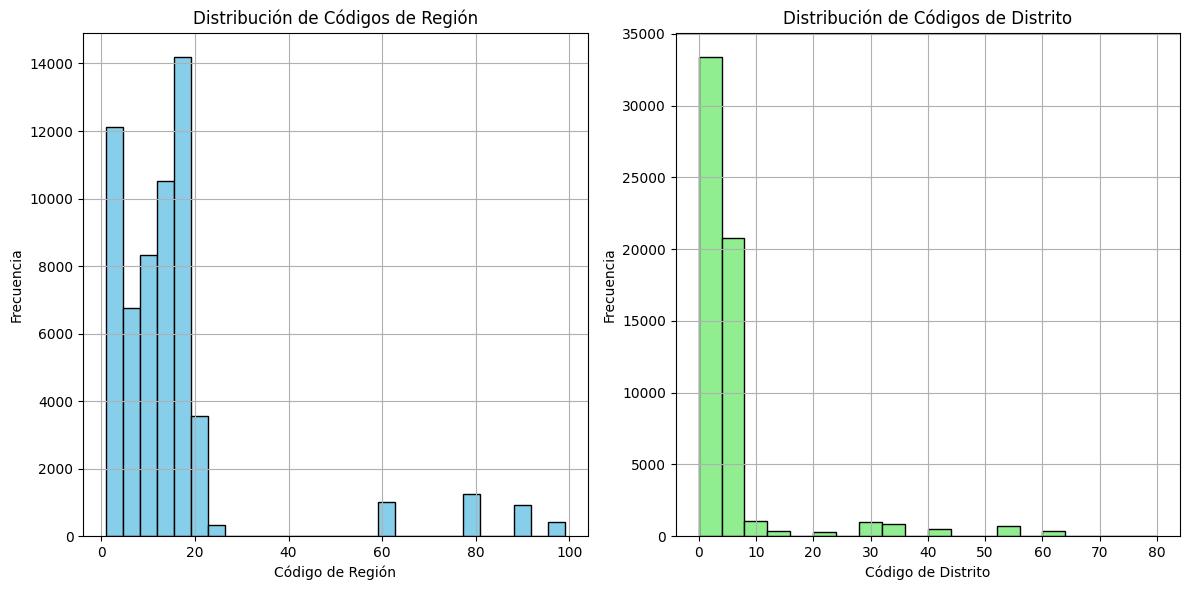

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6)) #creación de la figura con dos histogramas

# Histograma para region_code
axs[0].hist(datos_training['region_code'], bins=27, color='skyblue', edgecolor='black')
axs[0].set_xlabel('Código de Región')
axs[0].set_ylabel('Frecuencia')
axs[0].set_title('Distribución de Códigos de Región')
axs[0].grid(True)

# Histograma para district_code
axs[1].hist(datos_training['district_code'], bins=20, color='lightgreen', edgecolor='black')
axs[1].set_xlabel('Código de Distrito')
axs[1].set_ylabel('Frecuencia')
axs[1].set_title('Distribución de Códigos de Distrito')
axs[1].grid(True)

plt.tight_layout()
plt.show()


<ipython-input-48-75e5e85077f9>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(datos_training['amount_tsh'], shade=True, color='orange')


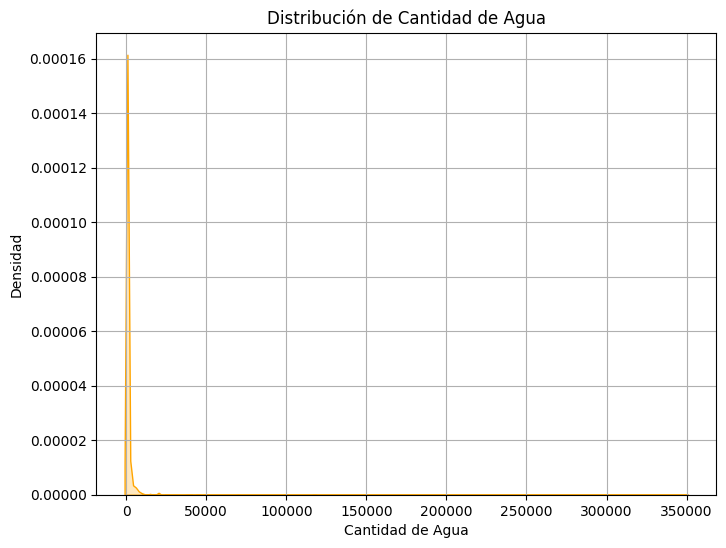

<ipython-input-48-75e5e85077f9>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(datos_training['gps_height'], shade=True, color='purple')


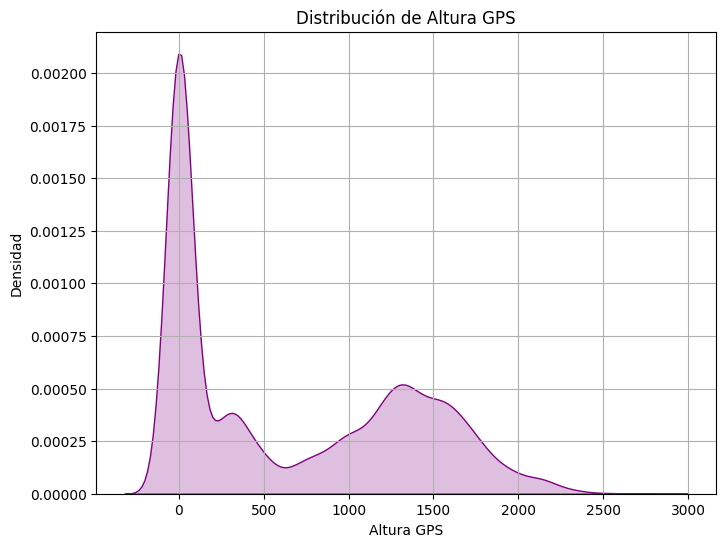

<ipython-input-48-75e5e85077f9>:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(datos_training['longitude'], shade=True, color='blue')
<ipython-input-48-75e5e85077f9>:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(datos_training['latitude'], shade=True, color='green')


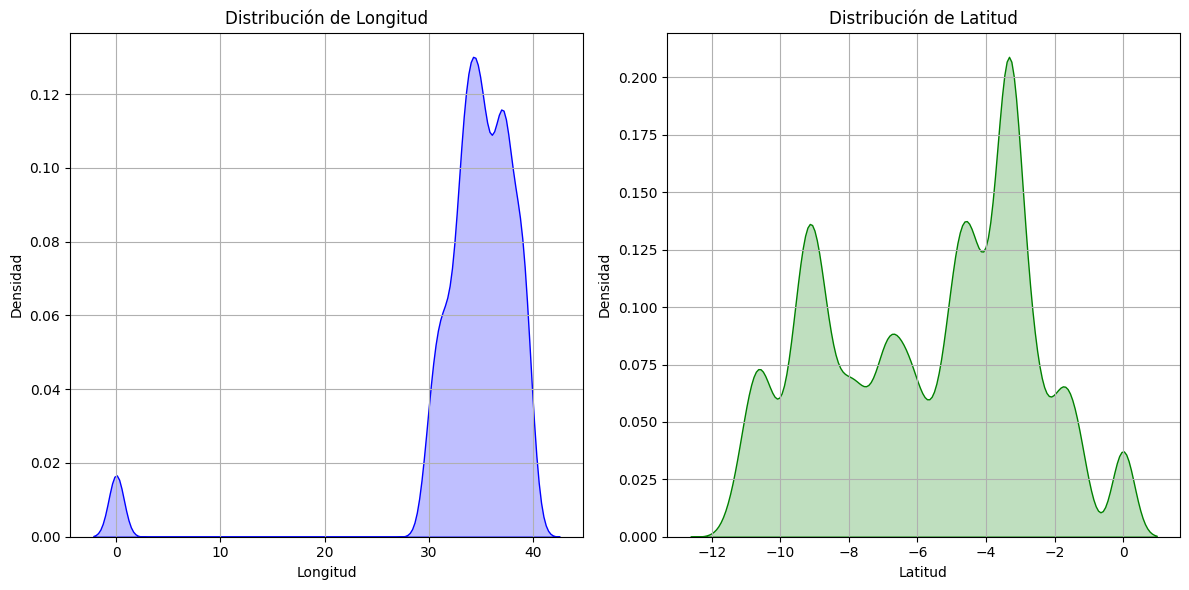

<ipython-input-48-75e5e85077f9>:40: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(datos_training['population'], shade=True, color='red')


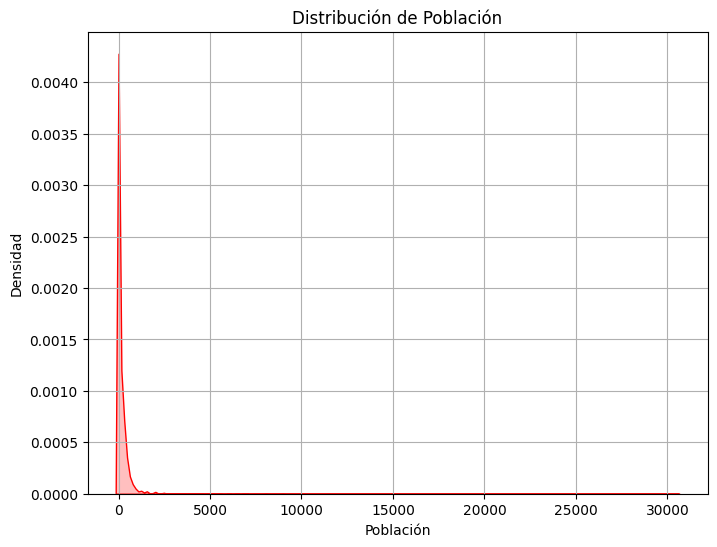

<ipython-input-48-75e5e85077f9>:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(datos_training['construction_year'], shade=True, color='brown')


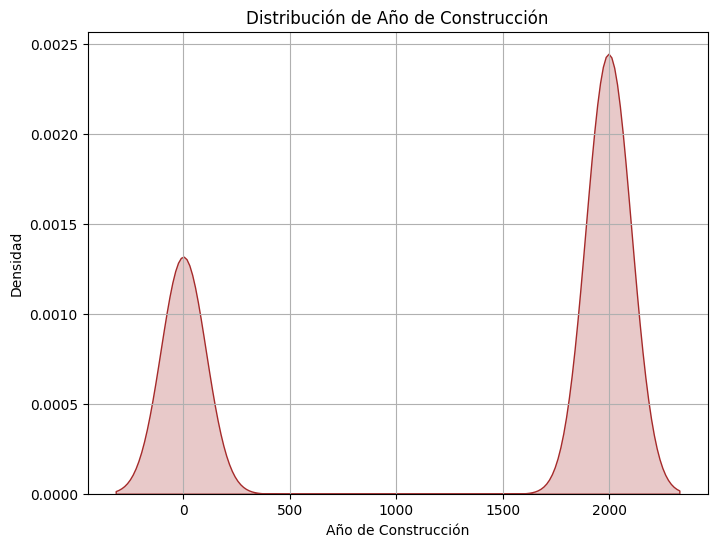

In [ ]:
# Gráfico de Densidad para amount_tsh
plt.figure(figsize=(8, 6))
sns.kdeplot(datos_training['amount_tsh'], shade=True, color='orange')
plt.xlabel('Cantidad de Agua')
plt.ylabel('Densidad')
plt.title('Distribución de Cantidad de Agua')
plt.grid(True)
plt.show()

# Gráfico de Densidad para gps_height
plt.figure(figsize=(8, 6))
sns.kdeplot(datos_training['gps_height'], shade=True, color='purple')
plt.xlabel('Altura GPS')
plt.ylabel('Densidad')
plt.title('Distribución de Altura GPS')
plt.grid(True)
plt.show()

# Gráfico de Densidad para longitude y latitude
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.kdeplot(datos_training['longitude'], shade=True, color='blue')
plt.xlabel('Longitud')
plt.ylabel('Densidad')
plt.title('Distribución de Longitud')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.kdeplot(datos_training['latitude'], shade=True, color='green')
plt.xlabel('Latitud')
plt.ylabel('Densidad')
plt.title('Distribución de Latitud')
plt.grid(True)

plt.tight_layout()
plt.show()

# Gráfico de Densidad para population
plt.figure(figsize=(8, 6))
sns.kdeplot(datos_training['population'], shade=True, color='red')
plt.xlabel('Población')
plt.ylabel('Densidad')
plt.title('Distribución de Población')
plt.grid(True)
plt.show()

# Gráfico de Densidad para construction_year
plt.figure(figsize=(8, 6))
sns.kdeplot(datos_training['construction_year'], shade=True, color='brown')
plt.xlabel('Año de Construcción')
plt.ylabel('Densidad')
plt.title('Distribución de Año de Construcción')
plt.grid(True)
plt.show()


aunque ya lo vimos cuando ejecutamos el codigo para ver la cantidad de 0 que hay, en la variable amount_tsh se ve de manera más clara que hay un repunte en el 0, por lo que puede indicar muchos pozos secos. Luego las variables de altura gps, latitud y longitud tienen los datos algo más distribuidos. Volvemos a ver el repunte de 0 en población.Estos repuntes pueden ser claves para el modelo. En cuanto al construction_year, hay dos repuntes, uno en el año 0, o sea aqui directamente no hay registro, y otro en el 2000. Vamos a ver el año más antiguo registrado como año de construcción.

In [ ]:
construction_year_filtered = datos_training[datos_training['construction_year'] > 0]['construction_year'] #filtramos la variable para excluir los valores 0
año_minimo = construction_year_filtered.min() # calculamos el año minimo registrado
print(año_minimo)
print(datos_training.construction_year.max())

1960
2013


Ahora sabemos que el año más antiguo registrado de construcción de un pozo es 1960, y el más reciente, 2013.

###variables categoricas training

Vamos a seguir los mismos pasos. Vamos a juntar en una variable las categoricas de training y ver sus valores unicos

In [ ]:
columnas_categoricas_training = datos_training.select_dtypes(include=['object'])
cat_valores_unicos = columnas_categoricas_training.nunique()
print(cat_valores_unicos)

date_recorded              356
funder                    1896
installer                 2145
wpt_name                 37399
basin                        9
subvillage               19287
region                      21
lga                        125
ward                      2092
public_meeting               2
recorded_by                  1
scheme_management           11
scheme_name               2695
permit                       2
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_group                6
quantity                     5
quantity_group               5
source                      10
source_type                  7
source_class                 3
waterpoint_type              7
waterpoint_type_group        6
dtype: int64


Seria interesante representar una figura con los diferentes graficos de cada variable categorica que tenga menos de 21 tipos de datos (se elije 21 porque al ejecutar un nunique, vemos que 21 es el número máximo de tipos de datos que podriamos representar en un gráfico), para ver como se distribuyen esos diferentes tipos de datos por cada variable.

In [ ]:
import matplotlib.pyplot as plt
num_rows = 7
num_cols = 3

columnas_object = datos_training.select_dtypes(include=['object']).columns #para obtener las columnas categoricas (tipo object)
filtered_columns = [column for column in columnas_object if datos_training[column].nunique() <= 21]#representar las categ de menos de 20 tipos difern de datos

# Calcular el número total de figuras necesarias
num_figures = (len(filtered_columns) - 1) // (num_rows * num_cols)

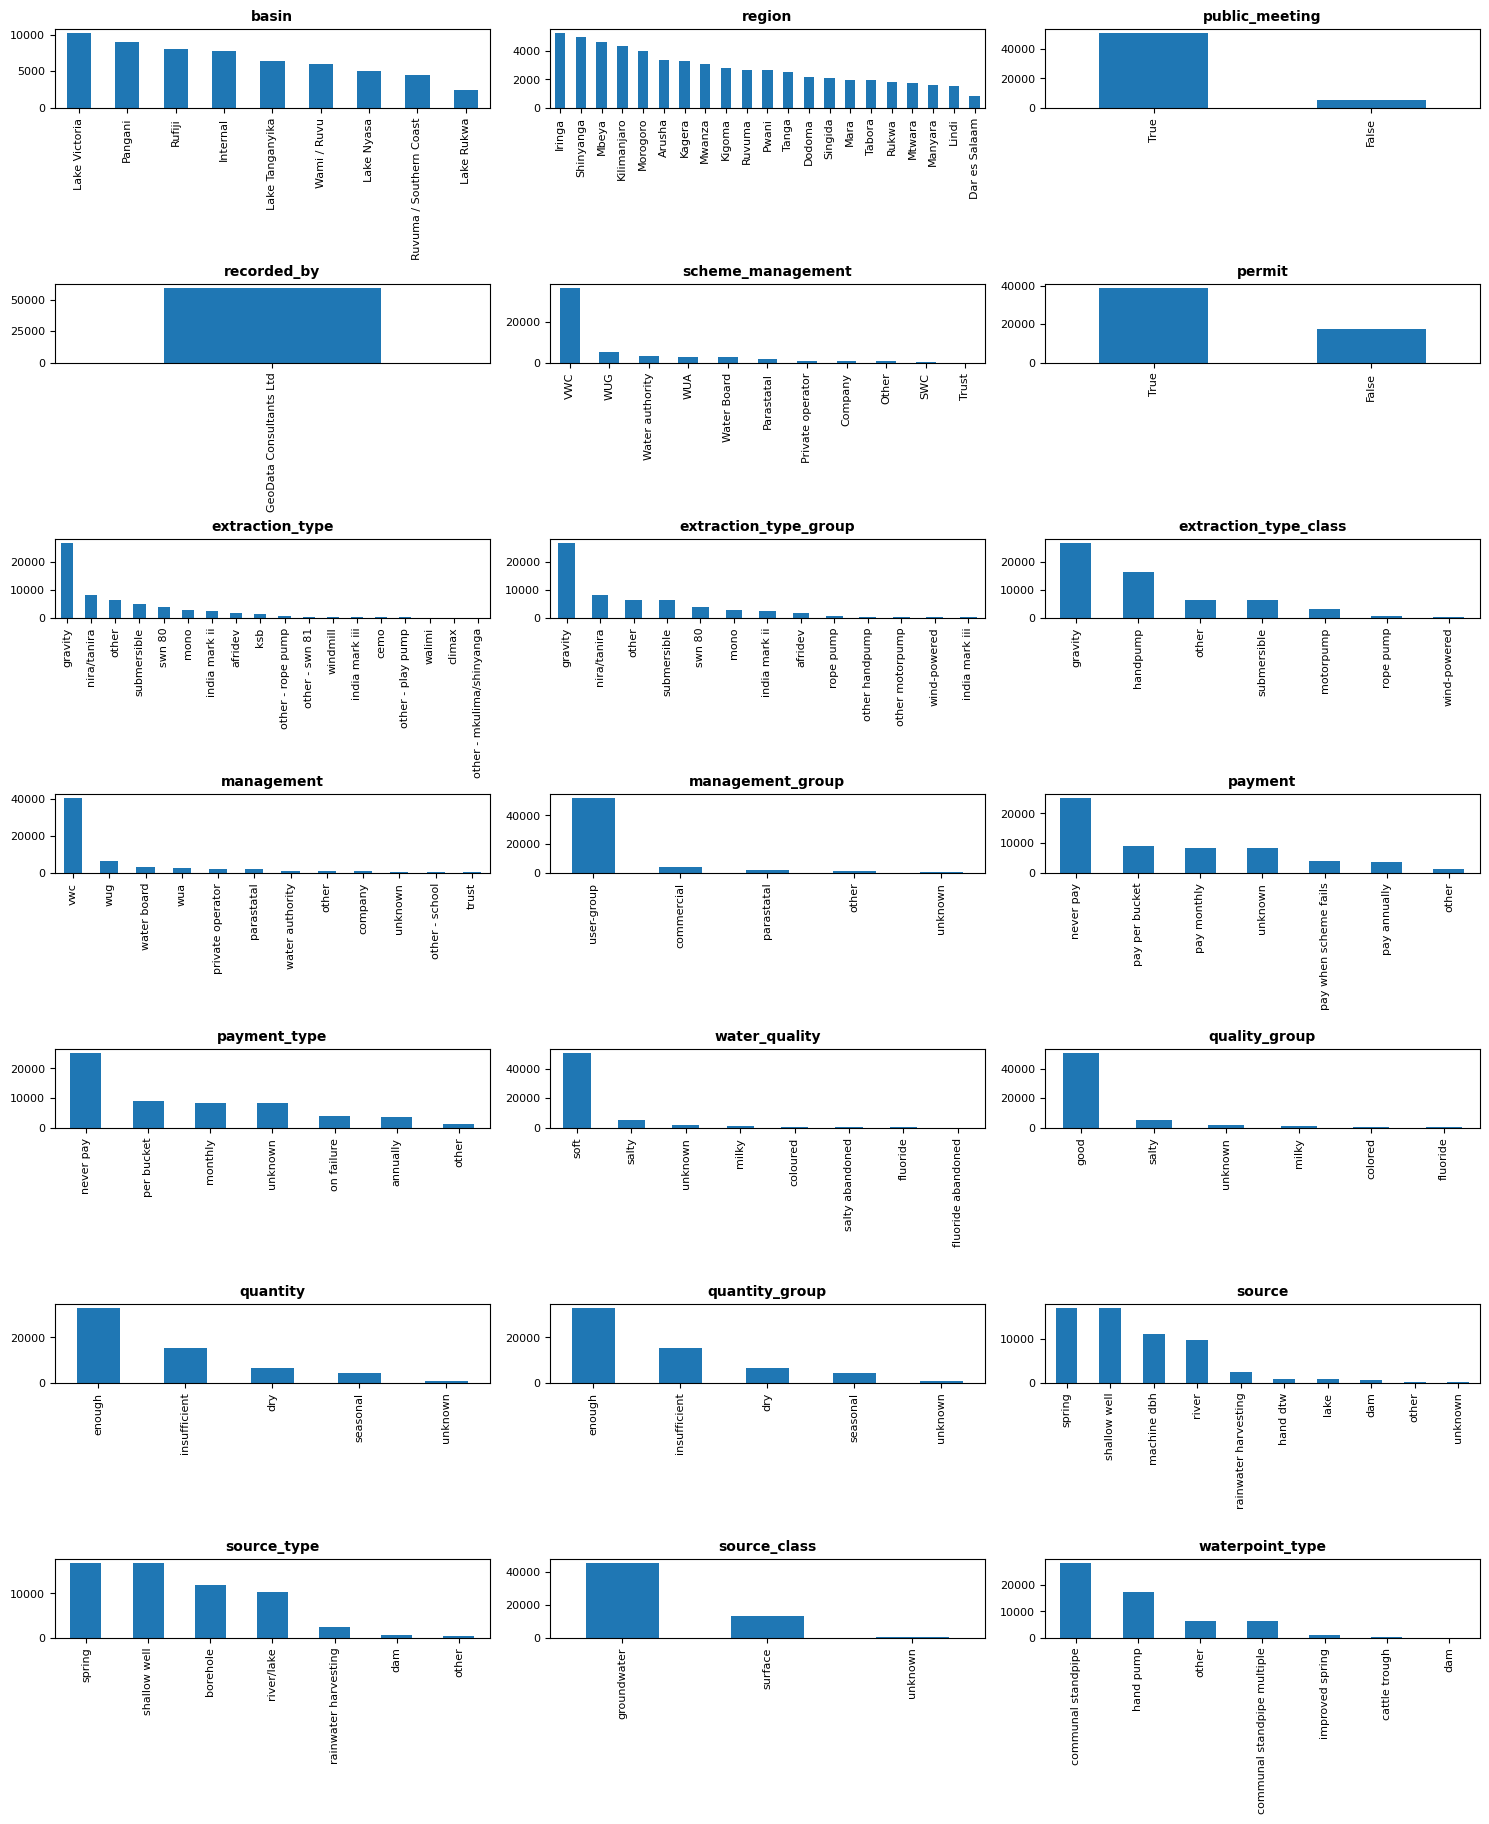

In [ ]:
# Iterar sobre cada figura
for f in range(num_figures):
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 20))  # Ajusta el tamaño según sea necesario
    axes = axes.flat

    # Iterar sobre las columnas y las posiciones de los subplots
    for i, column in enumerate(filtered_columns[f * num_rows * num_cols: (f + 1) * num_rows * num_cols]):
        row = i // num_cols
        col = i % num_cols
        ax = axes[i]

        # Graficar la distribución de la columna actual
        datos_training[column].value_counts().plot(kind='bar', ax=ax)
        ax.set_title(column, fontsize=10, fontweight='bold')
        ax.tick_params(labelsize=8)
        ax.set_xlabel("")

    fig.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

Estre gráfico es bastante esclarecedor sobre la realidad de las distintas columnas del los datos. Aqui se pueden ver no solo las frecuencias sino las diferentes categorias de todas ellas. En muchas las categorias son similares, por ejemplo las columnas del tipo 'extraction'. Concretamente 'extraction_type_class ' parece que agrupara en categorias más genéricas los diferntes tipos de extracción del agua del pozo, en cambio la variable 'extraction_type' tiene muchas más. Esto puede ser interesante tenerlo en cuenta para elegir una de estas tres para transformar. Similar pasa con las varaibles 'management' y management_group', 'source', 'source_type', 'source_class', y otras muchas similares.

En el grafico también vemos la variable public_meeting, que es binaria. También vemos la columna permit, que significa si ese punto de agua tiene permiso legal para estar abierto, que también es binaria. Ahora vamos a binarizar esas dos variables en nuestro dataframe original de datos de entranamiento

In [ ]:
#Binarización variables categoricas 'public_meeting' y 'permit'
variables_binarias = ['public_meeting', 'permit']

# Se reemplaza True con 1 y False con 0
for col in variables_binarias:
    datos_training[col] = datos_training[col].replace({True: 1, False: 0})

# Se verifican los cambios
print("Dataset con valores binarios reemplazados:")
print(datos_training.head())

# También se verifican los tipos de datos después del reemplazo
print("\nTipos de datos después del reemplazo:")
print(datos_training.dtypes)


Dataset con valores binarios reemplazados:
      id  amount_tsh date_recorded        funder  gps_height     installer  \
0  69572      6000.0    2011-03-14         Roman        1390         Roman   
1   8776         0.0    2013-03-06       Grumeti        1399       GRUMETI   
2  34310        25.0    2013-02-25  Lottery Club         686  World vision   
3  67743         0.0    2013-01-28        Unicef         263        UNICEF   
4  19728         0.0    2011-07-13   Action In A           0       Artisan   

   longitude   latitude              wpt_name                    basin  ...  \
0  34.938093  -9.856322                  none               Lake Nyasa  ...   
1  34.698766  -2.147466              Zahanati            Lake Victoria  ...   
2  37.460664  -3.821329           Kwa Mahundi                  Pangani  ...   
3  38.486161 -11.155298  Zahanati Ya Nanyumbu  Ruvuma / Southern Coast  ...   
4  31.130847  -1.825359               Shuleni            Lake Victoria  ...   

  payment_typ

Aqui ya se han binarizado esas dos categoricas, que ahora son de tipo int. Habra que tratar también sus nulos. Arriba tras ejecutar de nuevo las numericas, ya salen el numero de nulls que tienen. Hay que imputarlas. lo dejamos para despues, por si hay que convertir mas a numeriacs que tambien tengan nulls.

In [ ]:
datos_training.iloc[:, 15:26]

,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group
0,109,1.0,6,2244,0.0,1999,3,1,0,7,4
1,280,NaN,1,2695,1.0,2010,3,1,0,11,4
2,250,1.0,6,2120,1.0,2009,3,1,0,7,4
3,58,1.0,6,2695,1.0,1986,14,10,5,7,4
4,0,1.0,11,2695,1.0,0,3,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
59395,125,1.0,9,1068,1.0,1999,3,1,0,9,4
59396,56,1.0,6,479,1.0,1996,3,1,0,7,4
59397,0,1.0,6,2695,0.0,0,15,11,1,7,4
59398,0,1.0,6,2695,1.0,0,8,5,1,7,4


Ahora tratamos la columna llamada date_recorded, que contiene la fecha en la que se registró el dato de cada pozo. Esta variable esta en formato fecha de dia, mes y año. De cara a que sea util para el modelo, se pueden crear nuevas variables que representan diferentes aspectos de la fecha, es decir, una columna para el dia, otra para el mes y otra para el año.

In [ ]:
datos_training['date_recorded'] = pd.to_datetime(datos_training['date_recorded']) #aqui convertimos la columna date recorded en datetime para extraer las nuevas caracteristicas
datos_training['year_recorded'] = datos_training['date_recorded'].dt.year
datos_training['month_recorded'] = datos_training['date_recorded'].dt.month
datos_training['day_recorded'] = datos_training['date_recorded'].dt.day


In [ ]:
datos_training.drop(['date_recorded'], axis=1, inplace=True)

In [ ]:
print(datos_training.columns)


Index(['id', 'amount_tsh', 'funder', 'gps_height', 'installer', 'longitude',
       'latitude', 'wpt_name', 'num_private', 'basin', 'subvillage', 'region',
       'region_code', 'district_code', 'lga', 'ward', 'population',
       'public_meeting', 'scheme_management', 'scheme_name', 'permit',
       'construction_year', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group', 'year_recorded',
       'month_recorded', 'day_recorded'],
      dtype='object')


tras binarizar y transformar algunas categoricas (la de fecha, y las binarias) vamos a ver el resto de categoricas que hay, haciendo un nunique para ver el numero total de diferentes tipos de datos, y ver como las tratamos

In [ ]:
columnas_categoricas_training = datos_training.select_dtypes(include=['object'])
columnas_categoricas_training.nunique()

funder                    1896
installer                 2145
wpt_name                 37399
basin                        9
subvillage               19287
region                      21
lga                        125
ward                      2092
scheme_management           11
scheme_name               2695
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_group                6
quantity                     5
quantity_group               5
source                      10
source_type                  7
source_class                 3
waterpoint_type              7
waterpoint_type_group        6
dtype: int64

Tenemos otra columna, recorded_by, que registra solo 1 tipo de dato, que es la entidad que recopiló la información del dataframe. No es relevante para el modelo, por lo que la eliminamos.

In [ ]:
datos_training.drop(['recorded_by'], axis=1, inplace=True)

Hacemos una transformación a todas las variables categoricas con LabelEncoder, ejecutando de nuevo columnas_categoricas_training, que ya no tiene la columna 'recorded_by'

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() #creación del objeto LabelEncoder

# Iterar sobre cada columna categórica y aplicar LabelEncoder
for col in columnas_categoricas_training:
    datos_training[col] = le.fit_transform(datos_training[col])

In [ ]:
datos_training.head()

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,...,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,year_recorded,month_recorded,day_recorded
0,69572,6000.0,1368,1390,1518,34.938093,-9.856322,37398,1,11807,...,1,1,8,6,0,1,1,2011,3,14
1,8776,0.0,469,1399,545,34.698766,-2.147466,37194,4,15838,...,2,2,5,3,1,1,1,2013,3,6
2,34310,25.0,825,686,2048,37.460664,-3.821329,14572,5,9074,...,1,1,0,1,1,2,1,2013,2,25
3,67743,0.0,1740,263,1852,38.486161,-11.155298,37284,7,8982,...,0,0,3,0,0,2,1,2013,1,28
4,19728,0.0,20,0,119,31.130847,-1.825359,35528,4,7698,...,3,3,5,3,1,1,1,2011,7,13


Ahora vamos a ver los nulos de todos los datos

In [ ]:
datos_training.isnull().sum()

id                          0
amount_tsh                  0
funder                      0
gps_height                  0
installer                   0
longitude                   0
latitude                    0
wpt_name                    0
basin                       0
subvillage                  0
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting           3334
scheme_management           0
scheme_name                 0
permit                   3056
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity                    0
quantity_group              0
source                      0
source_typ

Las unicas variables con nulos son public_meeting y permit, antes binarizadas. Para imputarlas, podemos calcular la correlación que tienen estas variables con las demás del conjunto de datos de entrenamiento, para ver con cuales están más correlacionadas y calcular la mediana entre ellas, para rellenar esos nulos.

In [ ]:
# Calcular la correlación de Pearson con cada una de las variables public_meeting y permit
correlation_public_meeting = datos_training.corr()['public_meeting'].abs().sort_values(ascending=False)
correlation_permit = datos_training.corr()['permit'].abs().sort_values(ascending=False)

# Visualizar las correlaciones más altas
print("Correlaciones con 'public_meeting':")
print(correlation_public_meeting.head(10))

print("\nCorrelaciones con 'permit':")
print(correlation_permit.head(10))


Correlaciones con 'public_meeting':
public_meeting           1.000000
management_group         0.213508
permit                   0.137089
management               0.129500
scheme_management        0.115996
region                   0.094407
extraction_type_class    0.089072
waterpoint_type_group    0.080910
waterpoint_type          0.076022
extraction_type_group    0.070776
Name: public_meeting, dtype: float64

Correlaciones con 'permit':
permit                   1.000000
public_meeting           0.137089
waterpoint_type          0.136823
scheme_name              0.135239
extraction_type          0.132355
waterpoint_type_group    0.123546
extraction_type_group    0.115354
source_class             0.113507
quality_group            0.105748
longitude                0.100618
Name: permit, dtype: float64


gracias al coeficiente de correlacion de Pearson, vemos que public_meeting está mas correlacionada con management_group (tiene sentido. Esta variable representa cómo se gestiona el punto de agua, por lo que puede tener relación con las personas que lo gestionan y se reunen a ello). Y permit con public_meeting.

In [ ]:
#mediana de public_meeting agrupada por management_group para imputar los valores faltantes en public_meeting
datos_training['public_meeting'] = datos_training.groupby('management_group')['public_meeting'].transform(lambda x: x.fillna(x.median()))

In [ ]:
#mediana de permit agrupada por public_meeting para imputar los valores faltantes de permit
datos_training['permit'] = datos_training.groupby('waterpoint_type')['permit'].transform(lambda x: x.fillna(x.median()))

In [ ]:
datos_training.isnull().sum()

id                       0
amount_tsh               0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
scheme_management        0
scheme_name              0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
waterpoint_type          0
waterpoint_type_group    0
y

ya no tenemos valores nulos.

In [ ]:
datos_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   funder                 59400 non-null  int64  
 3   gps_height             59400 non-null  int64  
 4   installer              59400 non-null  int64  
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   wpt_name               59400 non-null  int64  
 8   basin                  59400 non-null  int64  
 9   subvillage             59400 non-null  int64  
 10  region                 59400 non-null  int64  
 11  region_code            59400 non-null  int64  
 12  district_code          59400 non-null  int64  
 13  lga                    59400 non-null  int64  
 14  ward                   59400 non-null  int64  
 15  po

###VARIABLE OBJETIVO

convertimos las categorias functional a 1, non functional a 2 y functional needs repair a 3.

In [ ]:
var_dep.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


Sería interesante ver una representación visual de como se distribuye la variable status_group por el conjunto de datos, por ejemplo con un diagrama de barras.

In [ ]:
import plotly.express as px
# Histograma de la variable status_group
fig = px.histogram(var_dep, x="status_group")
fig.show()

Ahora procedemos a hacer un mapeo para definir cada categoria de esta variable y asignarle un número, de cara a la aplicación de los modelos.

In [ ]:
# Crear un diccionario de mapeo
status_mapping = {
    'functional': 1,
    'non functional': 2,
    'functional needs repair': 3
}

# Aplicar el mapeo a la columna 'status_group'
var_dep['status_group'] = var_dep['status_group'].map(status_mapping)


In [ ]:
var_dep.head()

,id,status_group
0,69572,1
1,8776,1
2,34310,1
3,67743,2
4,19728,1


###PREPROCESAMIENTO DATOS DE TEST




Vemos la longitud de este dataframe y si tiene valores duplicados

In [ ]:
datos_test.shape

(14850, 40)

In [ ]:
datos_test['id'].duplicated().value_counts()

id
False    14850
Name: count, dtype: int64

####variables numericas de test

In [ ]:
columnas_numericas_test = datos_test.select_dtypes(include=['number']) #selecciono solo las numericas de training
num_valores_unicos = columnas_numericas_test.nunique()
print(num_valores_unicos)

id                   14850
amount_tsh              68
gps_height            2157
longitude            14390
latitude             14390
region_code             26
district_code           20
population             637
construction_year       55
dtype: int64


In [ ]:
columnas_numericas_test.isnull().sum()

id                   0
amount_tsh           0
gps_height           0
longitude            0
latitude             0
region_code          0
district_code        0
population           0
construction_year    0
dtype: int64

igual, no hay nulos en las numericas.Vamos a ver los valores a 0

In [ ]:
columnas_numericas_test = datos_test.select_dtypes(include=['number'])
num_zeros = (columnas_numericas_test == 0).sum()
print(num_zeros)

id                       0
amount_tsh           10410
gps_height            5211
longitude              457
latitude                 0
region_code              0
district_code            4
population            5453
construction_year     5260
dtype: int64


####variables categoricas de test

Aqui hacemos lo mismo, binarizar las variables public_meeting y permit.

In [ ]:
columnas_categoricas_test = datos_test.select_dtypes(include=['object'])
cat_valores_unicos_test = columnas_categoricas_test.nunique()
print(cat_valores_unicos_test)

funder                     979
installer                 1091
wpt_name                 10840
basin                        9
subvillage                8443
region                      21
lga                        125
ward                      1959
scheme_management           11
scheme_name               1788
extraction_type             17
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_group                6
quantity                     5
quantity_group               5
source                      10
source_type                  7
source_class                 3
waterpoint_type              7
waterpoint_type_group        6
dtype: int64


In [ ]:
variables_binarias_test = ['public_meeting', 'permit']

# Reemplazar True con 1 y False con 0 en las variables binarias
for col in variables_binarias_test:
    datos_test[col] = datos_test[col].replace({True: 1, False: 0})

# Verificar los cambios
print("Dataset con valores binarios reemplazados:")
print(datos_test.head())

# Verificar los tipos de datos después del reemplazo
print("\nTipos de datos después del reemplazo:")
print(datos_test.dtypes)


Dataset con valores binarios reemplazados:
      id  amount_tsh date_recorded                  funder  gps_height  \
0  50785         0.0    2013-02-04                    Dmdd        1996   
1  51630         0.0    2013-02-04  Government Of Tanzania        1569   
2  17168         0.0    2013-02-01                     NaN        1567   
3  45559         0.0    2013-01-22              Finn Water         267   
4  49871       500.0    2013-03-27                  Bruder        1260   

    installer  longitude   latitude                 wpt_name  \
0        DMDD  35.290799  -4.059696  Dinamu Secondary School   
1         DWE  36.656709  -3.309214                  Kimnyak   
2         NaN  34.767863  -5.004344           Puma Secondary   
3  FINN WATER  38.058046  -9.418672           Kwa Mzee Pange   
4      BRUDER  35.006123 -10.950412          Kwa Mzee Turuka   

                     basin  ... payment_type water_quality  quality_group  \
0                 Internal  ...    never pay      

También transformamos la columna date_recorded, creando 3 nuevas columnas para el dia, mes y año

In [ ]:
datos_test['date_recorded'] = pd.to_datetime(datos_test['date_recorded']) #aqui convertimos la columna date recorded en datetime para extraer las nuevas caracteristicas
datos_test['year_recorded'] = datos_test['date_recorded'].dt.year
datos_test['month_recorded'] = datos_test['date_recorded'].dt.month
datos_test['day_recorded'] = datos_test['date_recorded'].dt.day

In [ ]:
#y eliminamos la columna date_recorded de nuestro dataframe de training original
datos_test.drop(['date_recorded'], axis=1, inplace=True)

y eliminamos la columna recorded by

In [ ]:
datos_test.drop(['recorded_by'], axis=1, inplace=True)

In [ ]:
datos_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   funder                 13980 non-null  object 
 3   gps_height             14850 non-null  int64  
 4   installer              13973 non-null  object 
 5   longitude              14850 non-null  float64
 6   latitude               14850 non-null  float64
 7   wpt_name               14850 non-null  object 
 8   basin                  14850 non-null  object 
 9   subvillage             14751 non-null  object 
 10  region                 14850 non-null  object 
 11  region_code            14850 non-null  int64  
 12  district_code          14850 non-null  int64  
 13  lga                    14850 non-null  object 
 14  ward                   14850 non-null  object 
 15  po

Transformamos el resto de las categoricas con LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() #creación del objeto LabelEncoder

# Iterar sobre cada columna categórica y aplicar LabelEncoder
for col in columnas_categoricas_test:
    datos_test[col] = le.fit_transform(datos_test[col])

Y vemos los nulos

In [ ]:
datos_test.isnull().sum()

id                         0
amount_tsh                 0
funder                     0
gps_height                 0
installer                  0
longitude                  0
latitude                   0
wpt_name                   0
basin                      0
subvillage                 0
region                     0
region_code                0
district_code              0
lga                        0
ward                       0
population                 0
public_meeting           821
scheme_management          0
scheme_name                0
permit                   737
construction_year          0
extraction_type            0
extraction_type_group      0
extraction_type_class      0
management                 0
management_group           0
payment                    0
payment_type               0
water_quality              0
quality_group              0
quantity                   0
quantity_group             0
source                     0
source_type                0
source_class  

vamos a calcular con cuales variables están mas correlacionadas las que tienen nulos

In [ ]:
# Calcular la correlación de Pearson con cada una de las variables public_meeting y permit
correlation_public_meeting = datos_test.corr()['public_meeting'].abs().sort_values(ascending=False)
correlation_permit = datos_test.corr()['permit'].abs().sort_values(ascending=False)

# Visualizar las correlaciones más altas
print("Correlaciones con 'public_meeting':")
print(correlation_public_meeting.head(10))

print("\nCorrelaciones con 'permit':")
print(correlation_permit.head(10))

Correlaciones con 'public_meeting':
public_meeting           1.000000
management_group         0.231824
management               0.138047
scheme_management        0.136672
permit                   0.134038
region                   0.104111
payment_type             0.081422
extraction_type_class    0.081284
waterpoint_type_group    0.079156
waterpoint_type          0.075357
Name: public_meeting, dtype: float64

Correlaciones con 'permit':
permit                   1.000000
scheme_name              0.144935
waterpoint_type          0.135850
public_meeting           0.134038
extraction_type          0.126500
waterpoint_type_group    0.120915
source_class             0.112062
extraction_type_group    0.107967
longitude                0.107927
quality_group            0.106256
Name: permit, dtype: float64


Aqui también esta correlacionada public_meeting con management_group, sin embargo permit está correlacionada con scheme_name. Procedemos pues a imputar por mediana.

In [ ]:
#mediana de public_meeting agrupada por management_group para imputar los valores faltantes en public_meeting
datos_test['public_meeting'] = datos_test.groupby('management_group')['public_meeting'].transform(lambda x: x.fillna(x.median()))

In [ ]:
#mediana de permit agrupada por scheme_name para imputar los valores faltantes de permit
datos_test['permit'] = datos_test.groupby('scheme_name')['permit'].transform(lambda x: x.fillna(x.median()))

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local

In [ ]:
datos_test.isnull().sum()

id                        0
amount_tsh                0
funder                    0
gps_height                0
installer                 0
longitude                 0
latitude                  0
wpt_name                  0
basin                     0
subvillage                0
region                    0
region_code               0
district_code             0
lga                       0
ward                      0
population                0
public_meeting            0
scheme_management         0
scheme_name               0
permit                   53
construction_year         0
extraction_type           0
extraction_type_group     0
extraction_type_class     0
management                0
management_group          0
payment                   0
payment_type              0
water_quality             0
quality_group             0
quantity                  0
quantity_group            0
source                    0
source_type               0
source_class              0
waterpoint_type     

In [ ]:
# Imputar valores faltantes de 'permit' con la mediana agrupada por otra variable: la siguiente correlacionada?
datos_test['permit'] = datos_test.groupby('waterpoint_type')['permit'].transform(lambda x: x.fillna(x.median()))


ya no hay nulos.

In [ ]:
datos_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   funder                 14850 non-null  int64  
 3   gps_height             14850 non-null  int64  
 4   installer              14850 non-null  int64  
 5   longitude              14850 non-null  float64
 6   latitude               14850 non-null  float64
 7   wpt_name               14850 non-null  int64  
 8   basin                  14850 non-null  int64  
 9   subvillage             14850 non-null  int64  
 10  region                 14850 non-null  int64  
 11  region_code            14850 non-null  int64  
 12  district_code          14850 non-null  int64  
 13  lga                    14850 non-null  int64  
 14  ward                   14850 non-null  int64  
 15  po

###MODELO RANDONFOREST



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# definición de training y variable objetivo
X_train = datos_training
y_train = var_dep['status_group']
# Tus datos de prueba
X_test = datos_test

In [ ]:
# Definir el modelo Random Forest
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Entrenar el modelo
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Hacer predicciones
predictions = model_rf.predict(X_test)

###prepararlos para subir a la plataforma

In [ ]:
# Crear un diccionario de mapeo
status_mapping = {
    1: 'functional',
    2: 'non functional',
    3: 'functional needs repair'
}

# Convertir las predicciones numéricas a las etiquetas originales
predicted_labels = np.array([status_mapping[pred] for pred in predictions])


In [ ]:
# Crear un DataFrame con los IDs originales de los datos de prueba y las predicciones convertidas
results_df = pd.DataFrame({'id': datos_test['id'], 'status_group': predicted_labels})

In [ ]:
# Guardar el DataFrame en un archivo CSV
results_df.to_csv('modelorf1.csv', index=False)

In [ ]:
results_df

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14845,39307,non functional
14846,18990,functional
14847,28749,functional
14848,33492,functional


###2DO MODELO

Mientras realizaba este modelo, pensé en otras estrategias para probar en siguientes modelo, como por ejemplo imputar las variables numericas cuyos valores que son 0 no son significativos, como por ejemplo las variables construction_year, longitude o district _code.

En cuanto a las variables categóricas, pensé en las variables que tienen menos de 20 o 21 tipos de categorias que se representaron antes, y aunque estas siguen siendo muchas para hacer un preprocesamiento con OneHot Encoder, seleccionar las que pueden ser más representativas para aplicar OneHot Encoder y aplicar un modelo solo con ellas. Para otro modelo, puedo aplicar OneHot a estas variables, y LabelEncoder a las demás.

###Variables numéricas

Como mencioné antes, me gustaría normalizar algunas columnas numéricas cuyos valores a 0 no sean significativos en el modelo. Vamos a imprimir de nuevo las numericas y ver sus valores a 0

In [ ]:
columnas_numericas = datos_training.select_dtypes(include=['number'])
num_zeros = (columnas_numericas == 0).sum()
print(num_zeros)


id                       1
amount_tsh           41639
gps_height           20438
longitude             1812
latitude                 0
num_private          58643
region_code              0
district_code           23
population           21381
construction_year    20709
dtype: int64


algunas columnas pueden tener valores 0 que sean significativos, como amount_tsh, gps_height o population. En cambio otras, como longitude,district_code o construction year no tienen por qué ser significativos sus valores 0. Sería interesante graficar estas variables para ver como se distribuye el valor 0 a lo largo de los registros de las variables, y su relación con la variable objetivo. Por ejemplo, vamos a graficar construction_year creando una variable que hace un merge que une la varaible status_group al dataframe de datos_training solo para el grafico, para poder relacionar las dos variables.

<Figure size 1400x1000 with 0 Axes>

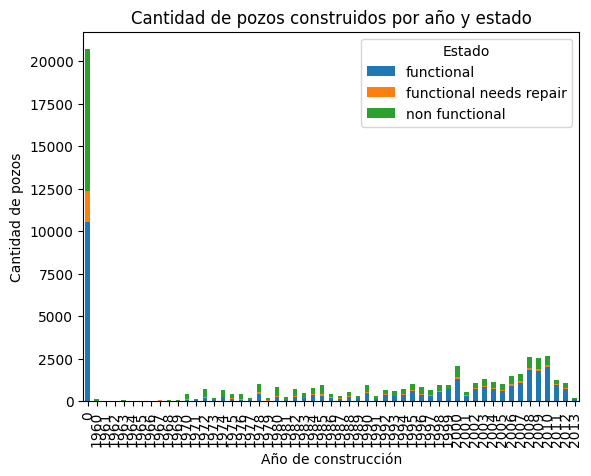

In [ ]:
import matplotlib.pyplot as plt
merged_data = datos_training.merge(var_dep, left_index=True, right_index=True)

plt.figure(figsize=(14, 10))
merged_data.groupby(['construction_year', 'status_group']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Cantidad de pozos construidos por año y estado')
plt.xlabel('Año de construcción')
plt.ylabel('Cantidad de pozos')
plt.legend(title='Estado')
plt.show()

aquí se puede ver que más de 20 mil registros tienen como año de construcción 0. Esta variable puede ser importante para el modelo porque puede dar indicios del estado del pozo, pero al tener mas de 20 mil registros con año de construcción desconocido, podriamos probar imputar estos valores con varias tecnicas como imputacion media, vecinos mas cercanos o modelos de regresión para predecir el año de construcción faltante basado en otras características del pozo.

Vamos a normalizarlas utilizando StandarScaler() del modulo de preprocessing de Sckitlearn

In [ ]:
#primero definimos las columnas que estandarizaremos y las que no.
columnas_estandarizadas = ['construction_year', 'longitude', 'district_code']
columnas_no_estandarizadas = ['amount_tsh', 'gps_height', 'population', 'latitude', 'region_code']

In [ ]:
#aplicamos la estandarización a las columnas seleccionadas, tanto a los datos de training como a los de test
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
datos_training[columnas_estandarizadas] = scaler.fit_transform(datos_training[columnas_estandarizadas])
datos_test[columnas_estandarizadas] = scaler.transform(datos_test[columnas_estandarizadas])


In [ ]:
columnas_numericas = datos_training.select_dtypes(include=['number'])
num_zeros = (columnas_numericas == 0).sum()
print(num_zeros)

id                           1
amount_tsh               41639
funder                     777
gps_height               20438
installer                    3
longitude                    0
latitude                     0
wpt_name                     1
basin                     7785
subvillage                   1
region                    3350
region_code                  0
district_code                0
lga                       1252
ward                        12
population               21381
public_meeting            5055
scheme_management         1061
scheme_name                  7
permit                   17492
construction_year            0
extraction_type           1770
extraction_type_group     1770
extraction_type_class    26780
management                 685
management_group          3638
payment                  25348
payment_type              3642
water_quality              490
quality_group              490
quantity                  6246
quantity_group            6246
source  

In [ ]:
columnas_numericas_test = datos_test.select_dtypes(include=['number'])
num_zeros = (columnas_numericas_test == 0).sum()
print(num_zeros)

id                       0
amount_tsh           10410
gps_height            5211
longitude                0
latitude                 0
num_private          14656
region_code              0
district_code            0
population            5453
construction_year        0
dtype: int64


Aquí ya vemos que las columnas elegidas se estandarizaron.

###Variables categóricas

En cuanto a las categóricas, ya que son la mayoría de los conjuntos tanto de training como de test, vamos a volver a hacer un nunique para ver los diferentes tipos de datos por cada variable.

In [ ]:
columnas_categoricas_training = datos_training.select_dtypes(include=['object'])
cat_valores_unicos = columnas_categoricas_training.nunique()
print(cat_valores_unicos)

date_recorded              356
funder                    1896
installer                 2145
wpt_name                 37399
basin                        9
subvillage               19287
region                      21
lga                        125
ward                      2092
public_meeting               2
recorded_by                  1
scheme_management           11
scheme_name               2695
permit                       2
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_group                6
quantity                     5
quantity_group               5
source                      10
source_type                  7
source_class                 3
waterpoint_type              7
waterpoint_type_group        6
dtype: int64


En este caso, vamos a hacer una transformación en OneHotEncoder para las variables categoricas que tienen menos de 10 tipos diferentes de datos. Para el resto de variables, haremos un labelEncoder, de los dos cnjuntos de datos: training y test.

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# definimos las columnas categoricas con menos de 10 tipos diferentes de datos para los datos de training y los de test
columns_onehot_training = [column for column in datos_training.columns
                           if datos_training[column].nunique() < 10 and datos_training[column].dtype == 'object']
columns_onehot_test = [column for column in datos_test.columns
                           if datos_test[column].nunique() < 10 and datos_test[column].dtype == 'object']

In [ ]:
# definimos las columnas categoricas con más de 10 tipos diferentes de datos
columns_label_training = [column for column in datos_training.columns
                          if column not in columns_onehot_training and datos_training[column].dtype == 'object']
columns_label_test = [column for column in datos_test.columns
                      if column not in columns_onehot_test and datos_test[column].dtype == 'object']

In [ ]:
# Aplicación de OneHotEncoder a las columnas con menos de 10 tipos de datos
#TRAINING
encoder_onehot_training = OneHotEncoder(sparse=False, drop='first')
onehot_training = encoder_onehot_training.fit_transform(datos_training[columns_onehot_training])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Aplicación de OneHotEncoder a las columnas con menos de 10 tipos de datos
#TEST
encoder_onehot_test = OneHotEncoder(sparse=False, drop='first')
onehot_test = encoder_onehot_test.fit_transform(datos_test[columns_onehot_test])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Obtención de los nombres de las nuevas columnas después de OneHotEncoder datos training
newcols_onehot_training = encoder_onehot_training.get_feature_names_out(columns_onehot_training)

In [ ]:
# Obtención de los nombres de las nuevas columnas después de OneHotEncoder datos test
newcols_onehot_test = encoder_onehot_test.get_feature_names_out(columns_onehot_test)

In [ ]:
# creación de un DataFrame con las columnas OneHotEncoder training
training_onehot_df = pd.DataFrame(onehot_training, columns=newcols_onehot_training)

In [ ]:
# creación de un DataFrame con las columnas OneHotEncoder test
test_onehot_df = pd.DataFrame(onehot_test, columns=newcols_onehot_test)

In [ ]:
# Aplicaciòn de LabelEncoder a las columnas con más de 10 tipos de datos
encoder_label = LabelEncoder()
datos_label_training = datos_training[columns_label_training].apply(encoder_label.fit_transform)
datos_label_test = datos_test[columns_label_test].apply(encoder_label.fit_transform)

In [ ]:
# Concatenar los DataFrames con las variables transformadas
cat_transformadas_training = pd.concat([training_onehot_df, datos_label_training], axis=1)
cat_transformadas_test = pd.concat([test_onehot_df, datos_label_test], axis=1)

###MODELO REGRESIÓN LOGISTICA

Una vez hecha esta transformación de las categoricas, aplicamos el modelo, esta vez el de regresión logistica, ya que este modelo es ideal para una transformación de los datos estandarizando los valores 0 de algunas numéricas. Pero antes tenemos que juntar los datos transformados

In [ ]:
#training
columnas_numericas
cat_transformadas_training
# Concatenar los DataFrames a lo largo de las columnas
datos_transformados_training = pd.concat([columnas_numericas, cat_transformadas_training], axis=1)

In [ ]:
#test
columnas_numericas_test
cat_transformadas_test
# Concatenar los DataFrames a lo largo de las columnas
datos_transformados_test = pd.concat([columnas_numericas_test, cat_transformadas_test], axis=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
# creamos el objeto de regresión logistica
modelo_logistico = LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# definición de training y variable objetivo
X_train_rl = datos_transformados_training
y_train_rl = var_dep['status_group']
# Tus datos de prueba
X_test_rl = datos_transformados_test

In [ ]:
# entrenamiento del modelo de regresion logistica
modelo_logistico.fit(X_train_rl, y_train_rl)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Hacer predicciones en el conjunto de prueba
prediccion_rl = modelo_logistico.predict(X_test_rl)

In [ ]:
# Crear un diccionario de mapeo
status_mapping = {
    1: 'functional',
    2: 'non functional',
    3: 'functional needs repair'
}

# Convertir las predicciones numéricas a las etiquetas originales
predicted_labels_rl = np.array([status_mapping[pred] for pred in prediccion_rl])

In [ ]:
# Crear un DataFrame con los IDs originales de los datos de prueba y las predicciones convertidas
results_df_rl = pd.DataFrame({'id': datos_test['id'], 'status_group': predicted_labels_rl})

In [ ]:
# Guardar el DataFrame en un archivo CSV
results_df_rl.to_csv('modelorl2.csv', index=False)

Me dió un 0.5, un modelo no muy bueno.

###3ER MODELO


De cara a probar otro modelo, me gustaría esta vez no utilizar todas las variables, sino solo algunas que considere significativas para el modelo. Vamos a imprimir de nuevo todas las columnas (después de la transformación de algunas, como por ejemplo la de data_recorded, y tras eliminar la de num_private)

In [ ]:
datos_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             59400 non-null  int64  
 1   amount_tsh                     59400 non-null  float64
 2   date_recorded                  59400 non-null  object 
 3   funder                         55763 non-null  object 
 4   gps_height                     59400 non-null  int64  
 5   installer                      55745 non-null  object 
 6   longitude                      59400 non-null  float64
 7   latitude                       59400 non-null  float64
 8   wpt_name                       59398 non-null  object 
 9   num_private                    59400 non-null  int64  
 10  basin                          59400 non-null  object 
 11  subvillage                     59029 non-null  object 
 12  region                         59400 non-null 

como se observa, hay algunas variables que son similares en su concepto, por ejemplo extraction_type, extraction_type_group y extraction_type_class, y que difieren en el número de tipos de datos distintos, o categorías distintas. De cara al siguiente modelo, sería interesante ver cual de estas tres está más correlacionada con la variable objetivo para decidir cual tomar para el modelo. Para ello, preprocesamos las variables categoricas que queremos correlacionar con la objetivo, que también estará transformada a datos numéricos.

In [ ]:
from sklearn.preprocessing import LabelEncoder

#objeto label_encoder y aplicacion a las variables que quiero transformar
label_encoder = LabelEncoder()
datos_training['extraction_type_encoded'] = label_encoder.fit_transform(datos_training['extraction_type'])
datos_training['extraction_type_group_encoded'] = label_encoder.fit_transform(datos_training['extraction_type_group'])
datos_training['extraction_type_class_encoded'] = label_encoder.fit_transform(datos_training['extraction_type_class'])

In [ ]:
# Calcular correlación
correlation_extraction_type = datos_training['extraction_type_encoded'].corr(var_dep['status_group'])
correlation_extraction_type_group = datos_training['extraction_type_group_encoded'].corr(var_dep['status_group'])
correlation_extraction_type_class = datos_training['extraction_type_class_encoded'].corr(var_dep['status_group'])

print("Correlación con 'extraction_type_encoded':", correlation_extraction_type)
print("Correlación con 'extraction_type_group_encoded':", correlation_extraction_type_group)
print("Correlación con 'extraction_type_class_encoded':", correlation_extraction_type_class)


Correlación con 'extraction_type_encoded': 0.04447912662876709
Correlación con 'extraction_type_group_encoded': 0.04025552354801881
Correlación con 'extraction_type_class_encoded': 0.07830719014385067


Los resultados muestran que estas variables, las 3, tienen muy poca correlacion con la variable objetivo.  Sin calcular esta correlación uno podría pensar que es importante utilizar esta variable para predecir el estado de un pozo, que seria por tipo de extracción. Podemos calcular la correlación de otros conjuntos de columnas similares (para ello podemos ejecutar la transformación de las categoricas con LabelEncoder del modelo anterior) con la objetivo para decidir cuales tomar.

In [ ]:
#tras trasnformar todas las categoricas, pasamos a ver la correlación
correlation_source = datos_training['source'].corr(var_dep['status_group'])
correlation_source_type = datos_training['source_type'].corr(var_dep['status_group'])
correlation_source_class = datos_training['source_class'].corr(var_dep['status_group'])

print("Correlación con 'source':", correlation_source)
print("Correlación con 'source_type':", correlation_source_type)
print("Correlación con 'source_class':", correlation_source_class)

Correlación con 'source': -0.05044268950997253
Correlación con 'source_type': -0.03806693374248024
Correlación con 'source_class': 0.03272931964581835


Estas muestran unos resultados peores que las anteriores. Practicamente indican que no hay correlacion

In [ ]:
#tras trasnformar todas las categoricas, pasamos a ver la correlación
correlation_waterpoint_type = datos_training['waterpoint_type'].corr(var_dep['status_group'])
correlation_waterpoint_type_group = datos_training['waterpoint_type_group'].corr(var_dep['status_group'])

print("Correlación con 'waterpoint_type':", correlation_waterpoint_type)
print("Correlación con 'waterpoint_type_group':", correlation_waterpoint_type_group)


Correlación con 'waterpoint_type': 0.1277635382994337
Correlación con 'waterpoint_type_group': 0.12469138074315095


Estas muestran un poco más de correlación que las anteriores.

In [ ]:
#tras trasnformar todas las categoricas, pasamos a ver la correlación
correlation_extraction_type = datos_training['scheme_management'].corr(var_dep['status_group'])
correlation_extraction_type_group = datos_training['scheme_name'].corr(var_dep['status_group'])

print("Correlación con 'scheme_management':", correlation_extraction_type)
print("Correlación con 'scheme_name':", correlation_extraction_type_group)

Correlación con 'scheme_management': 0.010446223184871055
Correlación con 'scheme_name': 0.02673312887273891


estos resultados vuelven a mostrar una correlación baja entre la variable objetivo y las variables scheme_management y scheme_name

In [ ]:
#tras trasnformar todas las categoricas, pasamos a ver la correlación
correlation_extraction_type = datos_training['quantity'].corr(var_dep['status_group'])
correlation_extraction_type_group = datos_training['quantity_group'].corr(var_dep['status_group'])

print("Correlación con 'quantity':", correlation_extraction_type)
print("Correlación con 'quantity_group':", correlation_extraction_type_group)

Correlación con 'quantity': -0.05531566249724217
Correlación con 'quantity_group': -0.05531566249724217


####datos training

In [ ]:
nuevos_datos_training = datos_training.copy()

In [ ]:
columnas_a_eliminar = ['extraction_type', 'extraction_type_group', 'source', 'source_type', 'scheme_management']
nuevos_datos_training = nuevos_datos_training.drop(columns=columnas_a_eliminar, axis=1)

####datos test

In [ ]:
nuevos_datos_test = datos_test.copy()

In [ ]:
columnas_a_eliminar = ['extraction_type', 'extraction_type_group', 'source', 'source_type', 'scheme_management']
nuevos_datos_test = nuevos_datos_test.drop(columns=columnas_a_eliminar, axis=1)

###aplicacion modelo Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# definición de training y variable objetivo
X_train = nuevos_datos_training
y_train = var_dep['status_group']
# Tus datos de prueba
X_test = nuevos_datos_test

In [ ]:
# entrenamiento del modelo de árbol de decisiones
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

ValueError: Input X contains NaN.
DecisionTreeClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# Predecir en el conjunto de prueba
y_pred = model_dt.predict(X_test)

NameError: name 'model_dt' is not defined

In [ ]:
# Crear un diccionario de mapeo
status_mapping = {
    1: 'functional',
    2: 'non functional',
    3: 'functional needs repair'
}

# Convertir las predicciones numéricas a las etiquetas originales
predicted_labels = np.array([status_mapping[pred] for pred in y_pred])

In [ ]:
# Crear un DataFrame con los IDs originales de los datos de prueba y las predicciones convertidas
results_df_dt = pd.DataFrame({'id': datos_test['id'], 'status_group': predicted_labels})

In [ ]:
# Guardar el DataFrame en un archivo CSV
results_df_dt.to_csv('modelodt3.csv', index=False)

In [ ]:
results_df_dt

,id,status_group
0,50785,functional
1,51630,functional needs repair
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14845,39307,non functional
14846,18990,non functional
14847,28749,non functional
14848,33492,functional


Este modelo dió como resultado un 0.6, ligeramente mejor que el anterior.

###4TO MODELO

Vamos a volver al primer modelo que nos dio un buen resultado, y vamos a hacer algunas modificaciones. Antes que nada, ejecutamos de nuevo el preprocesamiento de las numericas,tratando los valores 0 que no son significativos de las variables como 'construction_year', 'longitude' y 'district_code'. En cuanto a las categoricas, tras binarizar public_meeting y  permit, y transformar la variable date_recorded creando 3 nuevas columnas por cada dato de fecha, se ejecuta el Label Encoder y se eliminan las variables que en el análisis del modelo anterior no mostraban una correlación alta con la variable objetivo, como son 'extraction_type', 'extraction_type_group', 'source', 'source_type', 'scheme_management'. Por lo tanto, Loa datos de training y test quedan asi:

In [ ]:
nuevos_datos_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   funder                 59400 non-null  int64  
 3   gps_height             59400 non-null  int64  
 4   installer              59400 non-null  int64  
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   wpt_name               59400 non-null  int64  
 8   basin                  59400 non-null  int64  
 9   subvillage             59400 non-null  int64  
 10  region                 59400 non-null  int64  
 11  region_code            59400 non-null  int64  
 12  district_code          59400 non-null  int64  
 13  lga                    59400 non-null  int64  
 14  ward                   59400 non-null  int64  
 15  po

In [ ]:
nuevos_datos_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   funder                 14850 non-null  int64  
 3   gps_height             14850 non-null  int64  
 4   installer              14850 non-null  int64  
 5   longitude              14850 non-null  float64
 6   latitude               14850 non-null  float64
 7   wpt_name               14850 non-null  int64  
 8   basin                  14850 non-null  int64  
 9   subvillage             14850 non-null  int64  
 10  region                 14850 non-null  int64  
 11  region_code            14850 non-null  int64  
 12  district_code          14850 non-null  int64  
 13  lga                    14850 non-null  int64  
 14  ward                   14850 non-null  int64  
 15  po

y se procede a aplicar el mismo modelo randomforest, esperando que estas modificaciones supongan una ligera mejora al primer modelo lanzado.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# definición de training y variable objetivo
X_train = nuevos_datos_training
y_train = var_dep['status_group']
# Tus datos de prueba
X_test = nuevos_datos_test

In [ ]:
# Definir el modelo Random Forest
model_rf_2 = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Entrenar el modelo
model_rf_2.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Hacer predicciones
predictions_2 = model_rf_2.predict(X_test)

In [ ]:
# Crear un diccionario de mapeo
status_mapping = {
    1: 'functional',
    2: 'non functional',
    3: 'functional needs repair'
}

# Convertir las predicciones numéricas a las etiquetas originales
predicted_labels_2 = np.array([status_mapping[pred] for pred in predictions_2])

In [ ]:
# Crear un DataFrame con los IDs originales de los datos de prueba y las predicciones convertidas
results_df_rf2 = pd.DataFrame({'id': datos_test['id'], 'status_group': predicted_labels_2})

In [ ]:
# Guardar el DataFrame en un archivo CSV
results_df_rf2.to_csv('modelorf2.csv', index=False)

In [ ]:
results_df_rf2

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,non functional
3,45559,non functional
4,49871,functional
...,...,...
14845,39307,non functional
14846,18990,functional
14847,28749,functional
14848,33492,functional


El resultado fue de un 0.80, no supuso mejora alguna, al contrario, bajo el score mínimamente.

###5TO MODELO

In [ ]:
from sklearn.linear_model import LogisticRegression
# creamos el objeto de regresión logistica
modelo_logistico_2 = LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# definición de training y variable objetivo
X_train_rl2 = datos_training
y_train_rl2 = var_dep['status_group']
# Tus datos de prueba
X_test_rl2 = datos_test

In [ ]:
# entrenamiento del modelo de regresion logistica
modelo_logistico_2.fit(X_train_rl2, y_train_rl2)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Hacer predicciones en el conjunto de prueba
prediccion_rl2 = modelo_logistico_2.predict(X_test_rl2)

In [ ]:
# Crear un diccionario de mapeo
status_mapping = {
    1: 'functional',
    2: 'non functional',
    3: 'functional needs repair'
}

# Convertir las predicciones numéricas a las etiquetas originales
predicted_labels_rl2 = np.array([status_mapping[pred] for pred in prediccion_rl2])

In [ ]:
# Crear un DataFrame con los IDs originales de los datos de prueba y las predicciones convertidas
results_df_rl2 = pd.DataFrame({'id': datos_test['id'], 'status_group': predicted_labels_rl2})

In [ ]:
# Guardar el DataFrame en un archivo CSV
results_df_rl2.to_csv('modeloRL2.csv', index=False)

Tras querer comprobar el preprocesamiento de las variables categoricas, todas, con LabelEncoder, el resultado final no varió mucho al modelo de Regresión Logistica aplicado anteriormente (0.56)

###6TO MODELO

Decision tree con el preprocesamiento del primer modelo y sin eliminar variables

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# definición de training y variable objetivo
X_train_dt2 = datos_training
y_train_dt2 = var_dep['status_group']
# Tus datos de prueba
X_test_dt2 = datos_test

# Crear el modelo de árbol de decisiones
model_dt2 = DecisionTreeClassifier(random_state=42)
model_dt2.fit(X_train_dt2, y_train_dt2)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Predecir en el conjunto de prueba
y_pred_dt2 = model_dt2.predict(X_test_dt2)

In [ ]:
# Crear un diccionario de mapeo
status_mapping = {
    1: 'functional',
    2: 'non functional',
    3: 'functional needs repair'
}

# Convertir las predicciones numéricas a las etiquetas originales
predicted_labels_dt2 = np.array([status_mapping[pred] for pred in y_pred_dt2])

In [ ]:
# Crear un DataFrame con los IDs originales de los datos de prueba y las predicciones convertidas
results_df_dt2 = pd.DataFrame({'id': datos_test['id'], 'status_group': predicted_labels_dt2})

In [ ]:
# Guardar el DataFrame en un archivo CSV
results_df_dt2.to_csv('modeloDT2.csv', index=False)

El score de este modelo no cambió significativamente en relación con el primer modelo de Árbol de Decisión primero que se aplicó (0.6530)